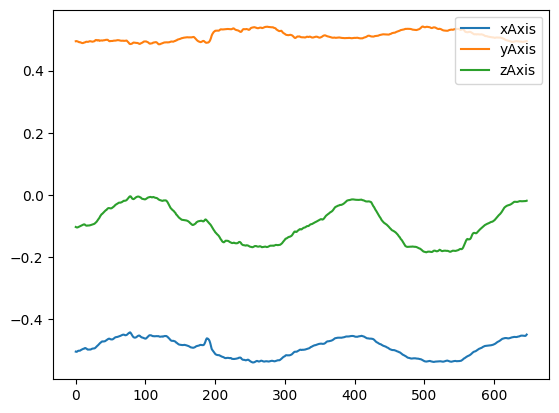

0      0.023205
1      0.023143
2      0.023488
3      0.023451
4      0.024280
         ...   
859         NaN
860         NaN
861         NaN
862         NaN
863         NaN
Length: 864, dtype: float64
min: xAxis   -0.538342
yAxis    0.484440
zAxis   -0.184196
dtype: float64
max: xAxis   -0.441478
yAxis    0.541744
zAxis   -0.004034
dtype: float64
P1: (-0.4414775, 0.4844397, -0.004033685)
P2: (-0.5383416, 0.5417438, -0.1841959)


0.0053544241257590585

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

current_directory = os.getcwd()

# Load the CSV file
filepath = f'{current_directory}\\data\\abv_test4.csv'
df = pd.read_csv(filepath, sep=';')

plt.plot(df['xAxis'], label='xAxis')
plt.plot(df['yAxis'], label='yAxis')
plt.plot(df['zAxis'], label='zAxis')
plt.legend(loc='upper right')
plt.show()


# Calculate min and max values for each column
min_values = df.min()
max_values = df.max()

P1 = (max_values['xAxis'], min_values['yAxis'], max_values['zAxis'])
P2 = (min_values['xAxis'], max_values['yAxis'], min_values['zAxis'])

# Calculate the line vector from P1 to P2
line_vector = np.array(P2) - np.array(P1)

# Function to calculate distance from a point to a line defined by two points
def point_to_line_dist(point, line_point1, line_point2):
    line_vector = np.array(line_point2) - np.array(line_point1)
    point_vector = np.array(point) - np.array(line_point1)
    line_unit_vector = line_vector / np.linalg.norm(line_vector)
    point_vector_proj = np.dot(point_vector, line_unit_vector)
    nearest_point_on_line = line_point1 + point_vector_proj * line_unit_vector
    distance = np.linalg.norm(np.array(point) - nearest_point_on_line)
    return distance

# Calculate the distance of each point to the line
distances = df.apply(lambda point: point_to_line_dist(point, P1, P2), axis=1)
print(distances)

# Now we can calculate the abbreviation as the standard deviation of these distances
abbreviation = distances.std()

print(f'min: {min_values}\nmax: {max_values}')
print(f'P1: {P1}\nP2: {P2}')
abbreviation